## Multiple Alignment and Phylogenetic trees¶


### Getting started

1. Enter the "my_notebooks" folder and create a new folder "week05".  
2. In the "my_notebooks/week05" folder, open a notebook from this URL https://raw.githubusercontent.com/hlab1/teaching-fb2023/main/week06/week06_p1_msa_nCov.ipynb.
3. Clear all outputs by "Kernel"->"Restart Kernel and Clear All Outputs".

### Reading a multiple alignment file into R

In the recitation last week, we performed MSA of the coding sequences and amino acid sequences  of coronavirus spike protein.  We provide the MAFFT results of those two MSA in "spike_nt_mafft.fasta" and "spike_aa_mafft.fasta" files. Upload those two files to the "my_notebooks/week06" folder you just created.

**Make sure these two files are ending in `.fasta` but not `.fasta.txt`!**

Now we can load the MSA results into R using the `readAAMultipleAlignment` function in the `Biostrings` package.

In [1]:
library("Biostrings")

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: XVector

Loading required package: GenomeInfoDb


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:



In [2]:
aa_aln <- readAAMultipleAlignment(filepath="spike_aa_mafft.fasta", format="fasta")

What is in the variable `aa_aln`?

In [3]:
aa_aln

AAMultipleAlignment with 24 rows and 1639 columns
      aln                                                   names               
 [1] MFLLTTKRTMFVFLVLL----PLVS...-GSCC-KFDEDDSEPVLKGVKLHYT MN996528.1_2019-n...
 [2] MFLLTTKRTMFVFLVLL----PLVS...-GSCC-KFDEDDSEPVLKGVKLHYT MN996527.1_2019-n...
 [3] ---------MFVFLVLL----PLVS...-GSCC-KFDEDDSEPVLKGVKLHYT NC_045512.2_2019-...
 [4] --------MKILILAFL----ANLA...-GSCC-KFDEDDSEPVLKGVKLHYT FJ588692.1_Bat_SA...
 [5] --------MKLLVLVFA----TLVS...-GSCC-KFDEDDSEPVLKGVKLHYT KC881007.1_Bat_SA...
 [6] M------IVLVTCLLLLCSYHTVLS...CHSICSRRQFENYEPI-EKVHVH-- NC_002306.3_Felin...
 [7] MI-----HSVFLLMFLL----TPTE...-NRCCDRYEEYDLEP--HKVHVH-- KT357810.1_Middle...
 [8] MI-----HSVFLLMFLL----TPTE...-NRCCDRYEEYDLEP--HKVHVH-- KT357811.1_MERS_c...
 [9] MI-----HSVFLLMFLL----TPTE...-NRCCDRYEEYDLEP--HKVHVH-- KT357812.1_MERS_c...
 ... ...
[16] ---------MFIFLLFL----TLTS...-GSCC-KFDEDDSEPVLKGVKLHYT AY687365.1_SARS_c...
[17] ---------MFIFLLFL----TLTS...-GSCC-KFDEDDSEPVLKGVKLHYT A

R is printing a compact representation of `aa_aln`.

## Building phylogenetic trees for protein sequences¶

We first need to calculate the distance matrix resulting from this alignment. We will use the functions in the "ape" package for this purpose.

First we convert our `aa_aln` object to a "AAbin" format, then use the `dist.aa` function to create a distance matrix.

In [4]:
library("ape")
aa_bin <- as.AAbin(aa_aln) # Convert the alignment to "AAbin" format
aa_dist <- dist.aa(aa_bin) # Calculate the genetic distance matrix
as.matrix(aa_dist)


Attaching package: ‘ape’


The following object is masked from ‘package:Biostrings’:

    complement




,MN996528.1_2019-nCov_1,MN996527.1_2019-nCov_1,NC_045512.2_2019-nCov_1,FJ588692.1_Bat_SARS_Cov_Rs806/2006_1,KC881007.1_Bat_SARS-like_coronavirus_WIV1_1,NC_002306.3_Feline_infectious_peritonitis_virus_1,KT357810.1_Middle_East_respiratory_syndrome_coronavirus_isolate_Riyadh_1175/KSA/2014_1,KT357811.1_MERS_coronavirus_isolate_Riyadh_1337/KSA/2014_1,KT357812.1_MERS_coronavirus_isolate_Riyadh_1340/KSA/2014_1,KF811036.1_MERS_coronavirus_strain_Tunisia-Qatar_2013_1,⋯,AY687361.1_SARS_coronavirus_B029_1,AY687365.1_SARS_coronavirus_C013_1,AY687368.1_SARS_coronavirus_C018_1,AY648300.1_SARS_coronavirus_HHS-2004_1,DQ412594.1_SARS_coronavirus_isolate_CUHKtc10NP_1,DQ412596.1_SARS_coronavirus_isolate_CUHKtc14NP_1,DQ412609.1_SARS_coronavirus_isolate_CUHKtc32NP_1,KR559017.1_SARS-like_coronavirus_BatCoV/BB9904/BGR/2008_1,NC_028806.1_Swine_enteric_coronavirus_strain_Italy/213306/2009_1,NC_038861.1_Transmissible_gastroenteritis_virus_1
MN996528.1_2019-nCov_1,0,0,9,319,311,1231,993,994,993,994,⋯,323,323,322,323,322,322,323,382,1212,1226
MN996527.1_2019-nCov_1,0,0,9,319,311,1231,993,994,993,994,⋯,323,323,322,323,322,322,323,382,1212,1226
NC_045512.2_2019-nCov_1,9,9,0,311,303,1226,989,990,989,990,⋯,314,314,313,314,313,313,314,375,1207,1221
FJ588692.1_Bat_SARS_Cov_Rs806/2006_1,319,319,311,0,260,1224,988,988,988,988,⋯,270,269,271,266,265,266,266,335,1194,1217
KC881007.1_Bat_SARS-like_coronavirus_WIV1_1,311,311,303,260,0,1223,983,983,983,983,⋯,102,100,102,99,97,99,100,322,1201,1214
NC_002306.3_Feline_infectious_peritonitis_virus_1,1231,1231,1226,1224,1223,0,1250,1251,1251,1250,⋯,1219,1219,1219,1221,1219,1220,1220,1228,838,286
KT357810.1_Middle_East_respiratory_syndrome_coronavirus_isolate_Riyadh_1175/KSA/2014_1,993,993,989,988,983,1250,0,3,1,4,⋯,977,977,978,981,981,980,981,975,1255,1267
KT357811.1_MERS_coronavirus_isolate_Riyadh_1337/KSA/2014_1,994,994,990,988,983,1251,3,0,2,5,⋯,977,977,978,981,981,980,981,976,1253,1267
KT357812.1_MERS_coronavirus_isolate_Riyadh_1340/KSA/2014_1,993,993,989,988,983,1251,1,2,0,3,⋯,977,977,978,981,981,980,981,975,1254,1268
KF811036.1_MERS_coronavirus_strain_Tunisia-Qatar_2013_1,994,994,990,988,983,1250,4,5,3,0,⋯,977,977,978,981,981,980,981,975,1254,1267


The `nj` function creates a tree from a distance matrix using the Neighbor Joining method.  We can `plot` the tree in multiple ways.

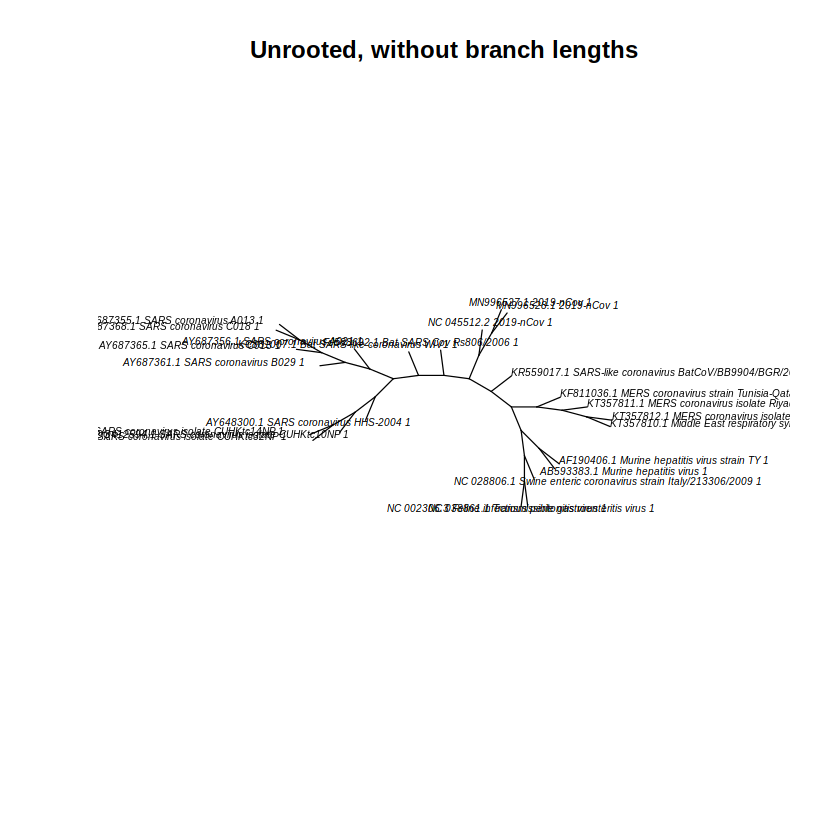

In [5]:
aa_tree <- nj(aa_dist)
plot(aa_tree,'unrooted',use.edge.length=FALSE,cex=0.5,
     main="Unrooted, without branch lengths")

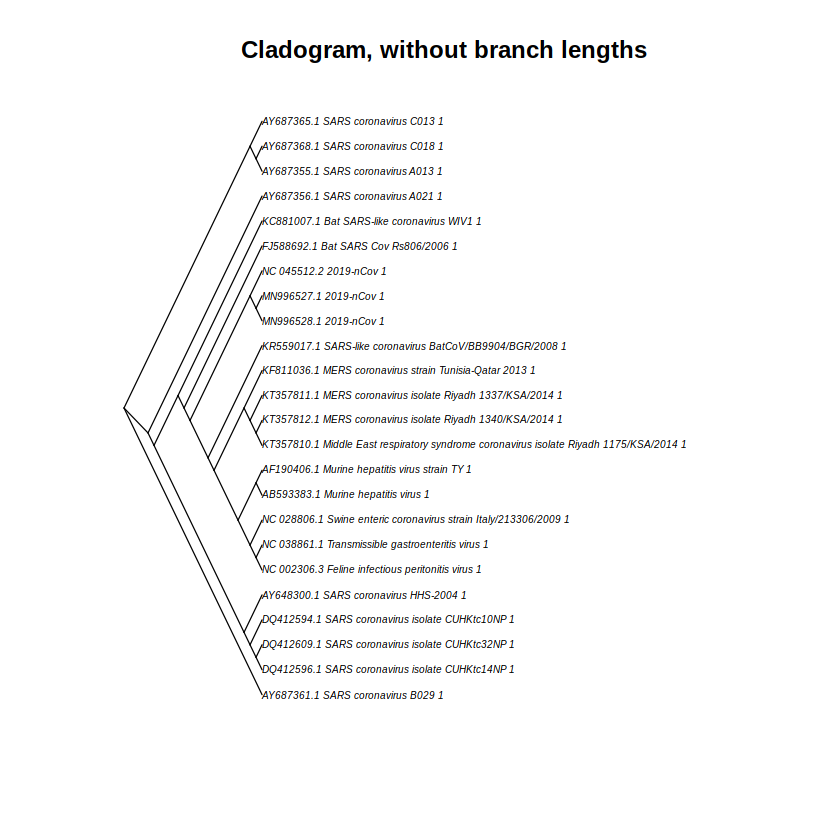

In [6]:
plot(aa_tree,'c',use.edge.length=FALSE,cex=0.5,main="Cladogram, without branch lengths")

Based on the spike protein sequqnce, which SARS coronavirus is the closest to the 2019-nCov isolates?

We can write this tree to a file in the Newick format.

In [7]:
write.tree(aa_tree,"spike_aa_tree.tre")

## Bootstrapping

The `read.alignment` function in the "seqinr" package creates an alignment object that can be used in the `unrootedNJtree` and `rootedNJtree` function to create a bootstrap tree. 


The `unrootedNJtree` function accepts the alignment and the type of the alignment ("DNA" or "protein").

In [8]:
library("seqinr")
aa_aln2  <- read.alignment(file = "spike_aa_mafft.fasta", format = "fasta")


Attaching package: ‘seqinr’


The following objects are masked from ‘package:ape’:

    as.alignment, consensus


The following object is masked from ‘package:Biostrings’:

    translate




In [9]:
unrootedNJtree <- function(alignment,type) {
     # this function requires the ape and seqinR packages:
     require("ape")
     require("seqinr")
     # define a function for making a tree:
     makemytree <- function(alignmentmat)
     {
        alignment <- ape::as.alignment(alignmentmat)
        if      (type == "protein")
        {
           mydist <- dist.alignment(alignment)
        }
        else if (type == "DNA")
        {
           alignmentbin <- as.DNAbin(alignment)
           mydist <- dist.dna(alignmentbin)
        }
        mytree <- nj(mydist)
        mytree <- makeLabel(mytree, space="") # get rid of spaces in tip names.
        return(mytree)
     }
     # infer a tree
     mymat  <- as.matrix.alignment(alignment)
     mytree <- makemytree(mymat)
     # bootstrap the tree
     myboot <- boot.phylo(mytree, mymat, makemytree)
     # plot the tree:
     plot.phylo(mytree,type="u")   # plot the unrooted phylogenetic tree
     nodelabels(myboot,cex=0.7)    # plot the bootstrap values
     mytree$node.label <- myboot   # make the bootstrap values be the node labels
     return(mytree)
  }

Running bootstraps:       100 / 100
Calculating bootstrap values... done.


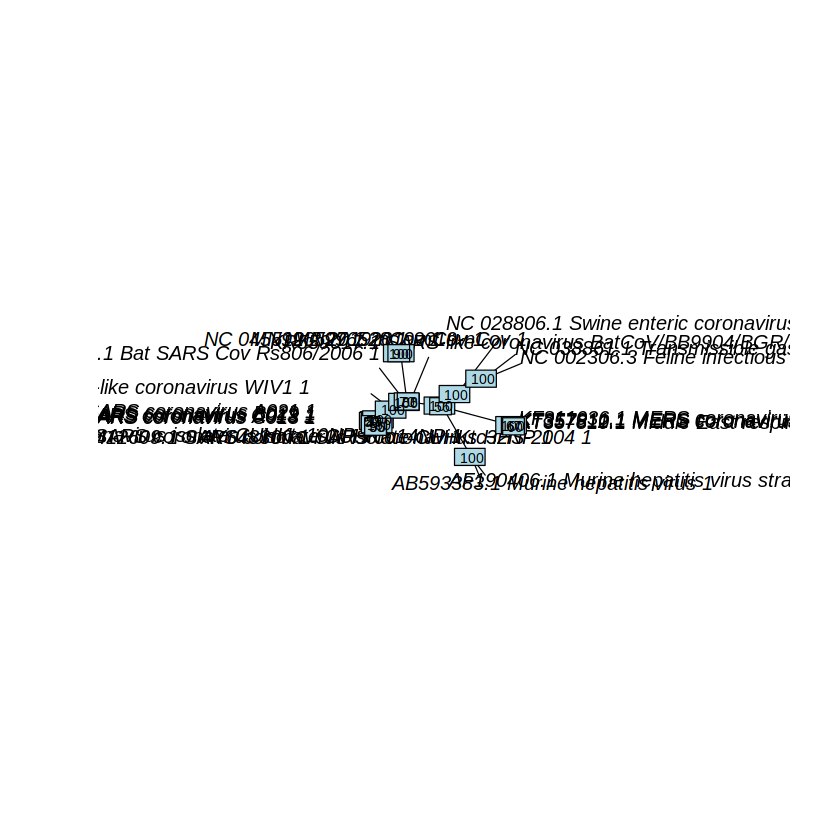

In [10]:
aa_nj_boot1 <- unrootedNJtree(aa_aln2,type="protein")

The `rootedNJtree` function accepts the alignment, a sequence in the alignment that is used as an "outgroup" to root the tree, and the type of the alignment ("DNA" or "protein").

In [11]:
rootedNJtree <- function(alignment, theoutgroup, type) {
     # load the ape and seqinR packages:
     require("ape")
     require("seqinr")
     # define a function for making a tree:
     makemytree <- function(alignmentmat, outgroup=`theoutgroup`)
     {
        alignment <- ape::as.alignment(alignmentmat)
        if      (type == "protein")
        {
           mydist <- dist.alignment(alignment)
        }
        else if (type == "DNA")
        {
           alignmentbin <- as.DNAbin(alignment)
           mydist <- dist.dna(alignmentbin)
        }
        mytree <- nj(mydist)
        mytree <- makeLabel(mytree, space="") # get rid of spaces in tip names.
        myrootedtree <- root(mytree, outgroup, r=TRUE)
        return(myrootedtree)
     }
     # infer a tree
     mymat  <- as.matrix.alignment(alignment)
     myrootedtree <- makemytree(mymat, outgroup=theoutgroup)
     # bootstrap the tree
     myboot <- boot.phylo(myrootedtree, mymat, makemytree)
     # plot the tree:
     plot.phylo(myrootedtree, type="p")  # plot the rooted phylogenetic tree
     nodelabels(myboot,cex=0.7)          # plot the bootstrap values
     myrootedtree$node.label <- myboot   # make the bootstrap values be the node labels
     return(myrootedtree)
  }

Running bootstraps:       100 / 100
Calculating bootstrap values... done.


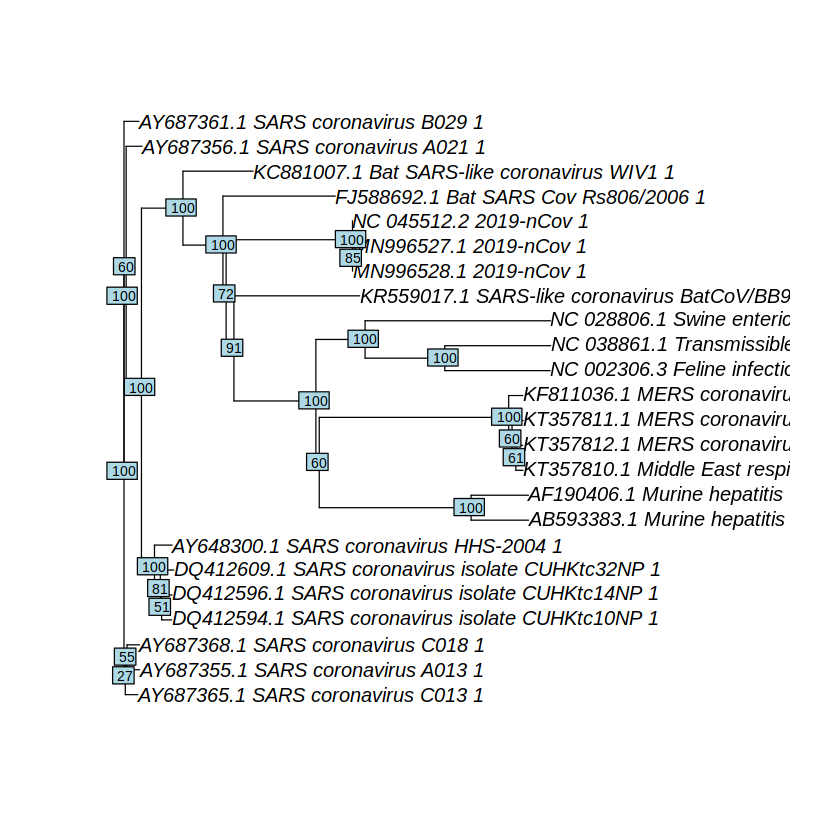

In [12]:
aa_nj_boot <- rootedNJtree(aa_aln2,"AY687361.1_SARS_coronavirus_B029_1",type="protein")

### Exercises

1. Try to draw a NJ tree with a different sequence as the outgroup. 
2. Read the DNA sequence alignment in the `spike_nt_mafft.fasta` file and create an unrooted and a rooted tree.  Compare the trees to the trees from the protein sequnce alignments.

In [13]:
tr = read.tree(text='(monkey, 
    (cat,
        (weasel,
            ((seal,sea_lion),
             (dog,
                 (racoon,bear)
              )
             )
         )
     )
);')

In [14]:
tr


Phylogenetic tree with 8 tips and 7 internal nodes.

Tip labels:
  monkey, cat, weasel, seal, sea_lion, dog, ...
Node labels:
  , 
, 
, 
, , 
, ...

Rooted; no branch lengths.

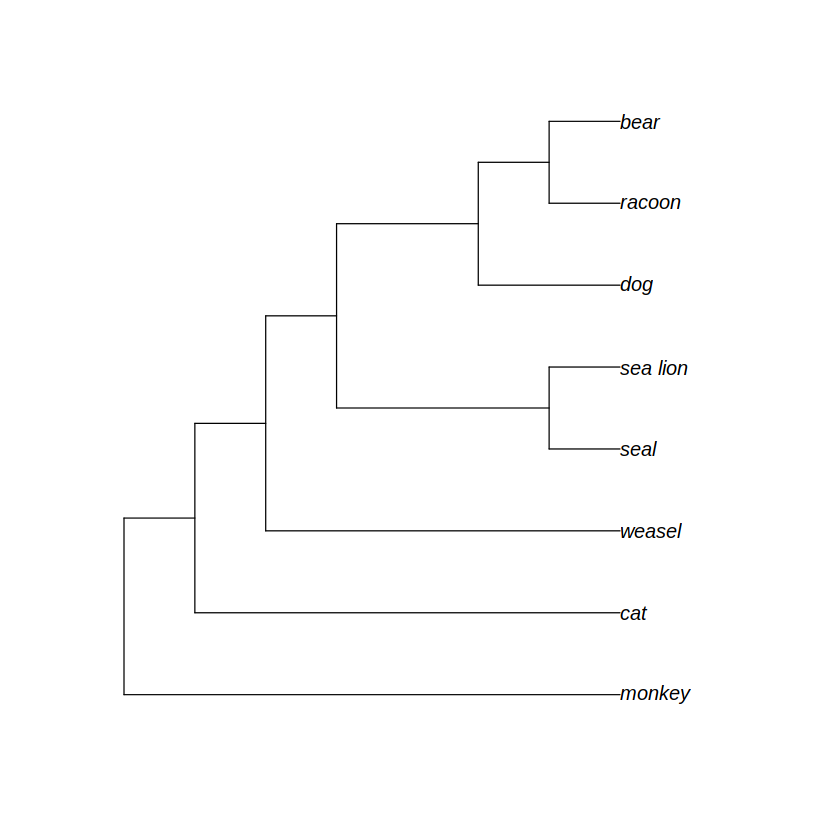

In [15]:
plot(tr)

In [16]:
unrooted_tr=unroot(tr)

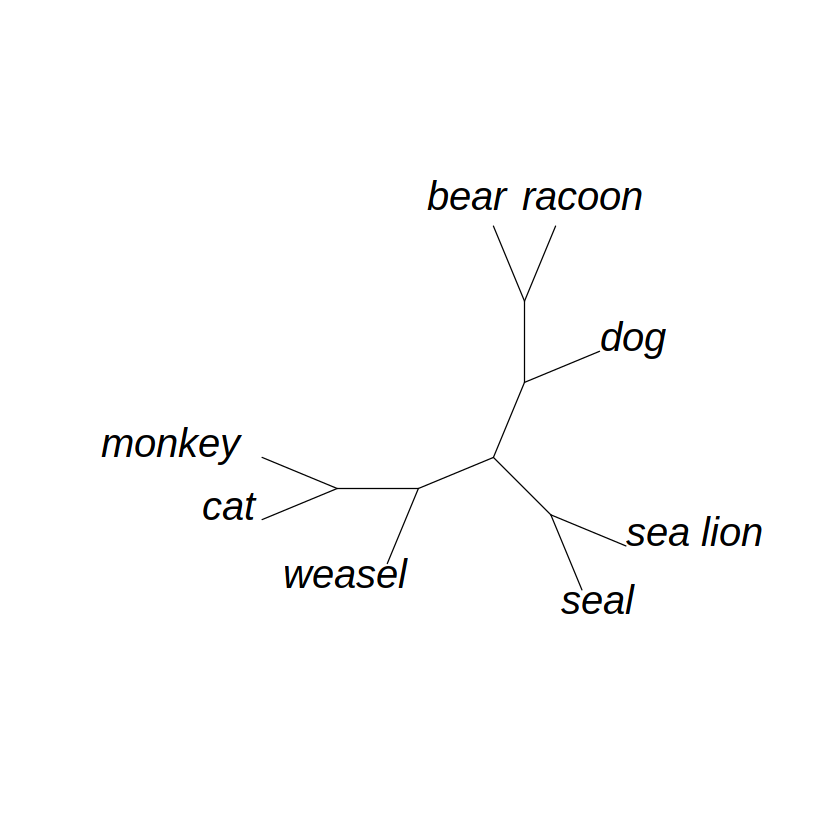

In [17]:
plot(unrooted_tr,'unrooted',cex=2,rotate.tree=-45)